In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import scipy.optimize as optimize
%config InlineBackend.figure_format = "retina"

In [2]:
# Define the boltzman constant

from pint import UnitRegistry
ureg = UnitRegistry()
Kb = ureg.boltzmann_constant
Kb = (1 * Kb).to('eV/kelvin').magnitude

In [3]:
# Binary system

def get_Al_concentration(C_Al_vac, C_Ni_vac, C_Al_anti, C_Ni_anti):
    
    return (0.5 - 0.5*(C_Al_vac + C_Ni_anti - C_Al_anti)) / (1 - 0.5*(C_Al_vac + C_Ni_vac))

$$\text{Concentration of Al and Ni for binary B2-NiAl}$$

$$ C_{Al} = \frac{0.5 - 0.5*(C_{Va_{Al}} + C_{Ni_{Al}} - C_{Al_{Ni}})}{ 1 - 0.5*(C_{Va_{Al}} + C_{Va_{Ni}} )} $$

$$ C_{Ni} = \frac{0.5 - 0.5*(C_{Va_{Ni}} + C_{Al_{Ni}} - C_{Ni_{Al}})}{ 1 - 0.5*(C_{Va_{Al}} + C_{Va_{Ni}} )} $$

In [4]:
def get_concentration(Formation_energy, T):
    
    return np.exp(-Formation_energy / (Kb*T))

In [5]:
# Energy values obtained from DFT calculations:

# Binary system

E_formB2 = -0.6623950965434235 # Formation enthalpy per atom of B2 NiAl
EnergyB2 = -10.538507650072436 # Supercell energy of B2 NiAl with one Ni and Al atoms
Energy_tot_Nivac = -667.92703466 # Supercell energy of B2 NiAl with one Ni vacancy
Energy_tot_Alvac = -668.29706527 # Supercell energy of B2 NiAl with one Al vacancy
Energy_tot_Nianti = -675.16111505 # Supercell energy of B2 NiAl with one Ni antisite
Energy_tot_Alanti = -671.1130517 # Supercell energy of B2 NiAl with one Al antisite
Energy_tot_PtonNi = -675.60409945 # Supercell energy of B2 NiAl with one Pt on Ni
Energy_tot_PtonAl = -676.26162198 # Supercell energy of B2 NiAl with one Pt on Al

# Reference bulk energies

Ni_bulk = -5.468482140262621 # Ni ferromagnetic bulk energy
Al_bulk = -3.745235316722968 # Al bulk energy
Pt_bulk = -6.096600128752684 # Pt bulk energy
Pd_bulk = -5.2161320522301935 # Pd bulk energy
n_repeat = 4 # 4x4x4 supercell

# Ternary system 10%Pt

total_E10PtB2NiAl = -689.4408127619649 # total energy of B2NiAl+10%Pt i.e 128 atoms
EfPtB2NiAl = -0.7156043880040347 # Formation enthalpy of B2NiAl+10%Pt per atom

# Calculated defect formation enthalpies of B2-NiAl+10%Pt

calc_E_Nivac = 0.26648108458032055
calc_E_Alvac = 1.461295550656755
calc_E_Ptvac = 0.7063524699675993
calc_E_Nianti = 0.9437994466730769
calc_E_Alanti = 1.4861039994896377
calc_E_PtonNi = 0
calc_E_PtonAl = 0.9536542820448224
# list_fnn = [2, 0, 4, 0, 2, 0, 0, 0]
# list_snn = [2, 0, 0, 1, 1, 3, 2, 2]

concentration_Pt = 0.1

Energies_Ni_vac = np.array([-682.97977858, -682.91755055, -682.74380818, -682.85062155, -683.00325599, -683.15672008, -683.07610917, -683.07988437])
Energies_Al_vac = np.array([-683.66462163,-683.25357966,-684.00813511,-683.43114508,-683.68748951,-683.23396061,-683.25875505, -683.2409652])
Energies_Ni_anti = np.array([-690.22282818, -690.19422028, -690.24191719, -690.23455013, -690.21813293, -690.20772702, -690.21116909, -690.25453341])
Energies_Al_anti = np.array([-686.34753595, -686.02603695, -686.04955644, -686.09514889, -686.43233931, -686.24264709, -685.99961279, -686.07497013])
Energies_PtonAl = np.array([-691.27445271, -691.41632525, -691.13494476, -691.35168918, -691.20464414, -691.53831291, -691.55195659, -691.65346678])
Energies_PtonNi = np.array([-690.65043562, -690.639174, -690.71500831, -690.69571903, -690.61046354, -690.60873226, -690.60083226, -690.58671423])
Energies_Pt_vac = np.array([-681.7081067, -681.81992112, -681.89712058, -681.95543589, -681.86820736, -682.12736601, -681.91115001, -681.81009078])

# Ternary system 10%Pd

# list_fnn_Pd = [4, 2, 0, 0, 2, 1, 1, 2]
# list_snn_Pd = [2, 0, 1, 0, 1, 2, 1, 1]

Energies_Pd_Nivac = np.array([-667.86783558, -667.85894031, -667.87078385, -667.81458299, -667.92889926, -667.85012061, -667.81175855, -667.84223908])
Energies_Pd_Alvac = np.array([-668.93812295, -668.55194504, -668.13274527, -668.16708672, -668.49180729, -668.31040664, -668.30667773, -668.48075467])
Energies_Pd_Nianti = np.array([-675.02250133, -675.09751481, -675.10419001, -675.15512468, -675.0645559, -675.07150949, -675.0919637, -675.12694058])
Energies_Pd_Alanti = np.array([-671.13405916, -670.9896101, -671.04632999, -671.02754791, -671.1247471, -671.1927363, -671.0427099, -671.3081047])
Energies_PdonNi = np.array([-674.45513582, -674.35585628, -674.3894627, -674.3989708, -674.40094265, -674.49242222, -674.48001323, -674.50790625])
Energies_PdonAl = np.array([-675.02835252, -675.21577598, -675.28243643, -675.14844375, -675.19335691, -675.2852332, -675.33318427, -675.18121921])

total_E10PdB2NiAl = -674.3842282655528 # Total energy of B2 NiAl+10%Pd (128 atoms)
EfPdB2NiAl = -0.6873973606476302 # Formation energy of B2 NiAl+10%Pd per atom
concentration_Pd = 0.1

# Tripple defect energy
td_total_energy = -662.05507314

In [6]:
# Old method for comparison purposes.

def get_formation_vacancy(Energy_tot, element, n_repeat=n_repeat):
    # Total formation Enthalpy of Ni and Al vacancy.
    if element=='Ni':
        tot_enthalpy = Energy_tot - (n_repeat**3)*Al_bulk - (n_repeat**3 - 1)*Ni_bulk
    if element=='Al':
        tot_enthalpy = Energy_tot - (n_repeat**3 - 1)*Al_bulk - (n_repeat**3)*Ni_bulk
        
    # vacancy enthalpy of Ni = total formation enthalpy with Ni vacancy - 127*formation enthalpy of B2NiAl per atom

    return tot_enthalpy - (2*(n_repeat**3) - 1)*(E_formB2)

def get_formation_antisites(Energy_tot, element, n_repeat=n_repeat):
    # Ni antisite energy formation = total energy of antisite - total energy of B2 NiAl - (energy of Ni - energy of Al)
    if element=='Ni':
        return Energy_tot - n_repeat**3 * EnergyB2 - (Ni_bulk - Al_bulk)
    # Al antisite energy formation = total energy of antisite - total energy of B2 NiAl - (energy of Al - energy of Ni)
    if element=='Al':
        return Energy_tot - n_repeat**3 * EnergyB2 - (Al_bulk - Ni_bulk)

In [7]:
def get_box_energy(tot, i, Ni_bulk = Ni_bulk, Al_bulk = Al_bulk, Pt_bulk=Pt_bulk):
    """
    Basically Enthalpy.
    Returns: supercell energy - n_Ni * Ni_Bulk - n_Al * Al_bulk - n_Pt * Pt_bulk
    
    """
    if i == 'Nivac':
        n_Ni = 63
        n_Al = 64
        n_Pt = 0
    if i == 'Alvac':
        n_Ni = 64
        n_Al = 63
        n_Pt = 0
    if i == 'Nianti':
        n_Ni = 65
        n_Al = 63
        n_Pt = 0
    if i == 'Alanti':
        n_Ni = 63
        n_Al = 65
        n_Pt = 0
    if i == 'PtonNi':
        n_Ni = 63
        n_Al = 64
        n_Pt = 1
    if i == 'PtonAl':
        n_Ni = 64
        n_Al = 63
        n_Pt = 1    
    if i == 'Bulk':
        n_Ni = 64
        n_Al = 64
        n_Pt = 0
        
    return tot - n_Ni * Ni_bulk - n_Al * Al_bulk - n_Pt * Pt_bulk

In [8]:
mu_Al = np.linspace(2*E_formB2 , 0, 1000)
mu_Ni = 2*E_formB2 - mu_Al

In [9]:
# Ni vacancy with respect to chemical potential: Supercell enthalpy - defect free enthalpy + mu_Ni

Ef_Nivac = get_box_energy(Energy_tot_Nivac, i='Nivac') - get_box_energy(64*EnergyB2, i='Bulk') + mu_Ni 

In [10]:
# Al vacancy with respect to chemical potential: Supercell enthalpy - defect free enthalpy + mu_Al

Ef_Alvac = get_box_energy(Energy_tot_Alvac, i='Alvac') - get_box_energy(64*EnergyB2, i='Bulk') + mu_Al 

In [11]:
# Ni antisite with respect to chemical potential: Supercell enthalpy - defect free enthalpy - mu_Ni + mu_Al

Ef_Nianti = get_box_energy(Energy_tot_Nianti, i='Nianti') - get_box_energy(64*EnergyB2, i='Bulk') - mu_Ni + mu_Al 

In [12]:
# Al antisite with respect to chemical potential: Supercell enthalpy - defect free enthalpy - mu_Al + mu_Ni

Ef_Alanti = get_box_energy(Energy_tot_Alanti, i='Alanti') - get_box_energy(64*EnergyB2, i='Bulk') + mu_Ni - mu_Al 

# Defect energies of B2 NiAl

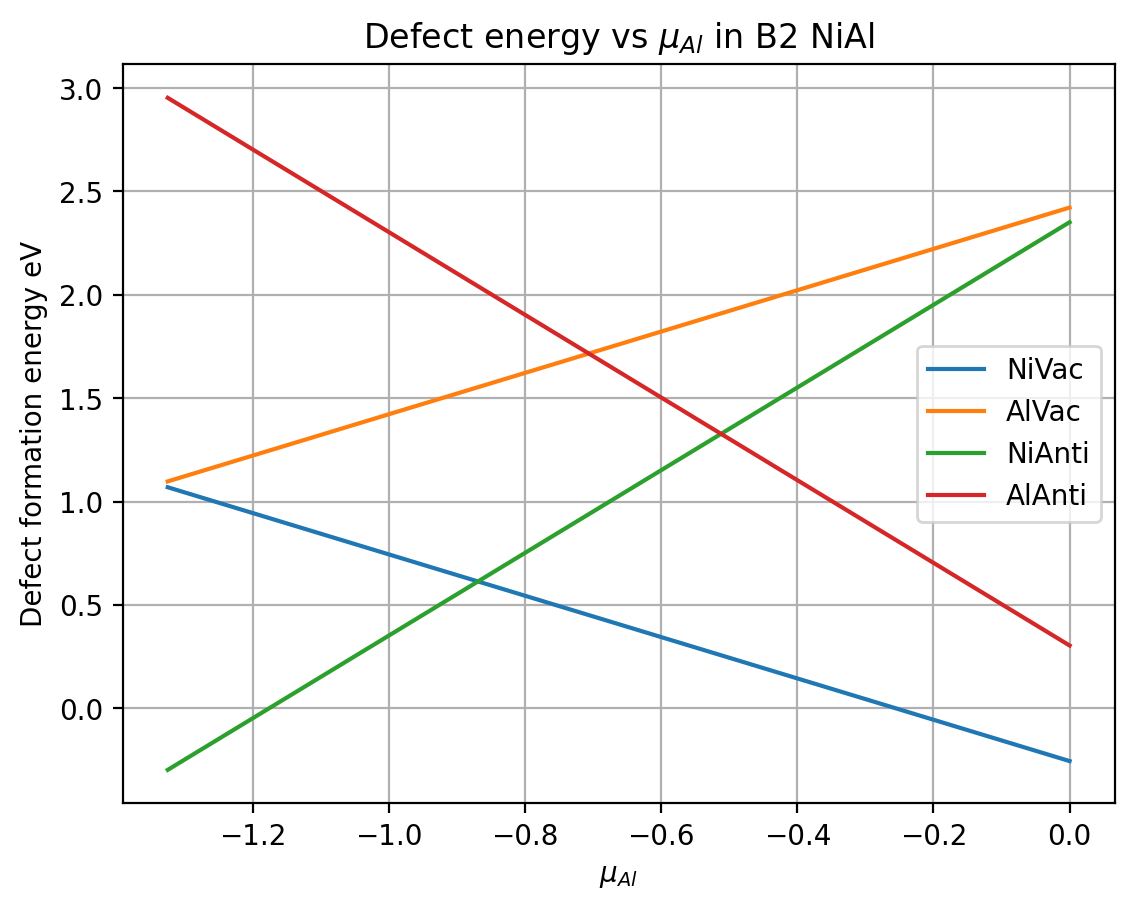

In [13]:
plt.plot(mu_Al, Ef_Nivac, label='NiVac')
plt.plot(mu_Al, Ef_Alvac, label='AlVac')
plt.plot(mu_Al, Ef_Nianti, label='NiAnti')
plt.plot(mu_Al, Ef_Alanti, label='AlAnti')
# plt.axvline(0, linestyle='--')
# plt.axvline(E_formB2, linestyle='--')
plt.xlabel('$\mu_{Al}$')
plt.ylabel('Defect formation energy eV')
plt.legend()
plt.grid()
plt.title('Defect energy vs $\mu_{Al}$ in B2 NiAl');

In [14]:
# Applying phase limits to the chemical potential

index = (mu_Al<-0.446) & (mu_Al>-1.03)

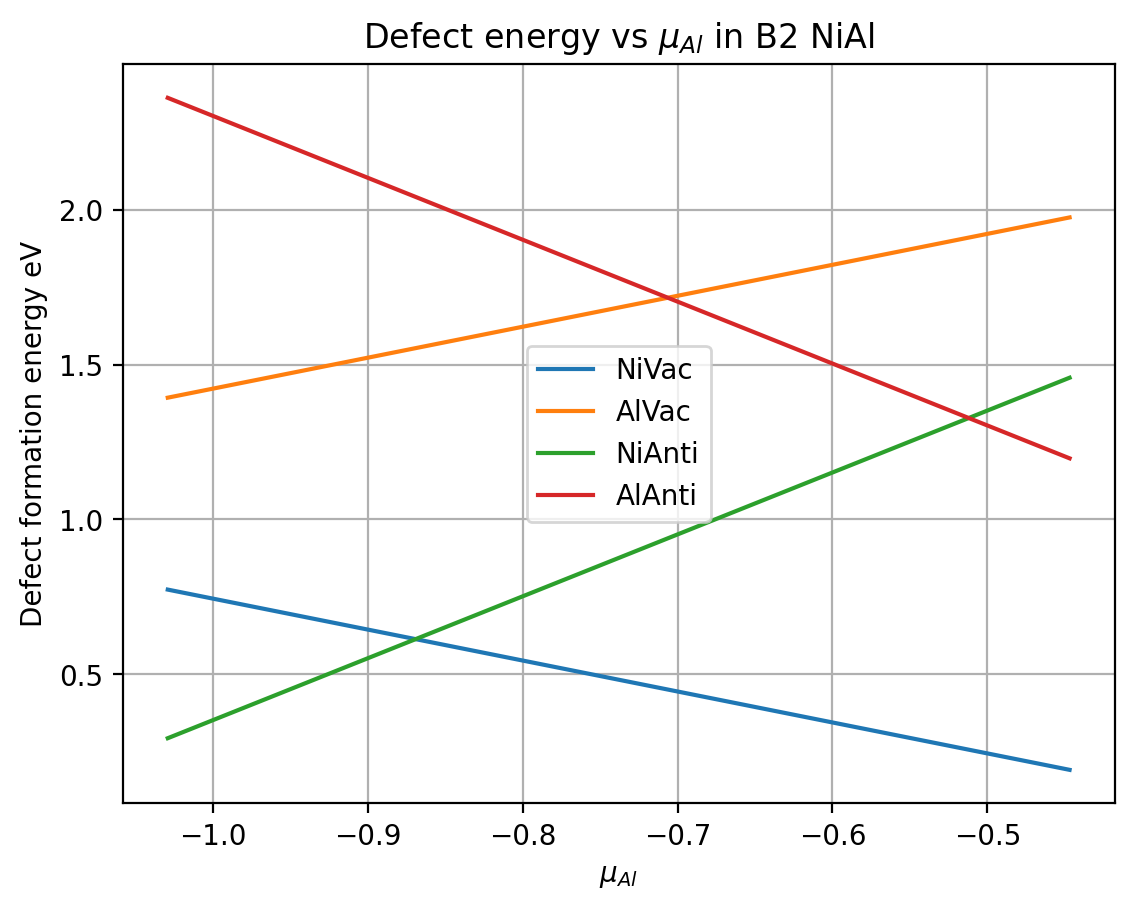

In [15]:
plt.plot(mu_Al[index], Ef_Nivac[index], label='NiVac')
plt.plot(mu_Al[index], Ef_Alvac[index], label='AlVac')
plt.plot(mu_Al[index], Ef_Nianti[index], label='NiAnti')
plt.plot(mu_Al[index], Ef_Alanti[index], label='AlAnti')
# plt.axvline(0, linestyle='--')
# plt.axvline(E_formB2, linestyle='--')
plt.xlabel('$\mu_{Al}$')
plt.ylabel('Defect formation energy eV')
plt.legend()
plt.grid()
plt.title('Defect energy vs $\mu_{Al}$ in B2 NiAl');

# Defect concentration of B2 NiAl

In [16]:
T = 1300

In [17]:
conc_Al = get_Al_concentration(get_concentration(Ef_Alvac[index], T), get_concentration(Ef_Nivac[index], T), 
                           get_concentration(Ef_Alanti[index], T), get_concentration(Ef_Nianti[index], T))

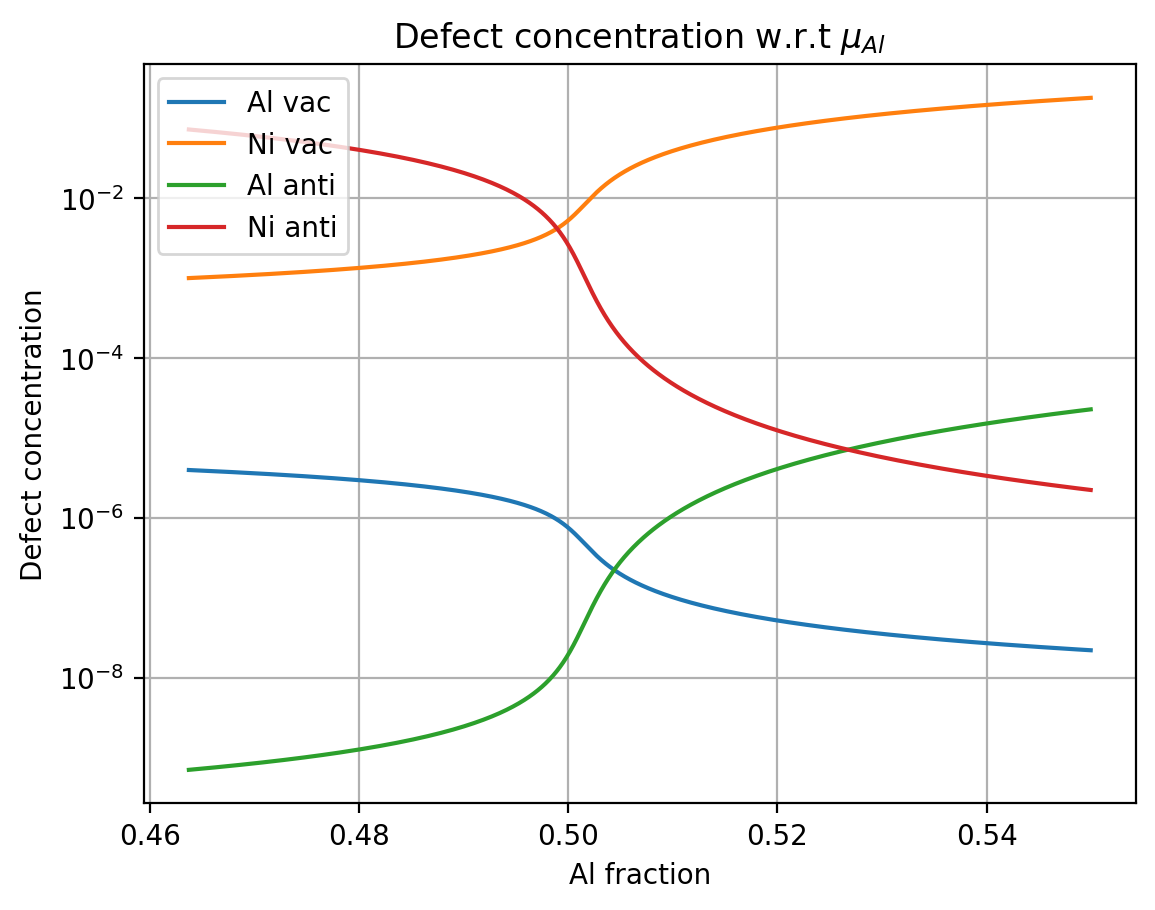

In [18]:
plt.plot(conc_Al, get_concentration(Ef_Alvac[index], T), label='Al vac')
plt.plot(conc_Al, get_concentration(Ef_Nivac[index], T), label='Ni vac')
plt.plot(conc_Al, get_concentration(Ef_Alanti[index], T), label='Al anti')
plt.plot(conc_Al, get_concentration(Ef_Nianti[index], T), label='Ni anti')
# plt.axhline(1e-3)
# plt.axvline(0.4)
plt.yticks(np.logspace(-11,-1,11))
plt.xlabel("Al fraction")
plt.ylabel("Defect concentration")
plt.title("Defect concentration w.r.t $\mu_{Al}$")
plt.yscale('log')
plt.grid()
plt.legend();

### Old method for comparison

In [19]:
old_Ef_Nivac = get_formation_vacancy(Energy_tot_Nivac,'Ni')
old_Ef_Alvac = get_formation_vacancy(Energy_tot_Alvac,'Al')
old_Ef_Nianti = get_formation_antisites(Energy_tot_Nianti,'Ni')
old_Ef_Alanti = get_formation_antisites(Energy_tot_Alanti,'Al')
old_NiAl_exp1 = np.exp(-(old_Ef_Alanti - old_Ef_Nivac + old_Ef_Alvac) / (Kb*T))
old_NiAl_exp2 = np.exp(-(old_Ef_Nianti + old_Ef_Nivac - old_Ef_Alvac) / (Kb*T))
old_NiAl_exp4 = np.exp(-(old_Ef_Nivac + old_Ef_Alvac) / (Kb*T))

In [20]:
def defect_concentration_B2NiAl_old_function(vars, yNi):
    """
    C_vacAl = a
    C_vacNi = b
    C_AlNi = c
    C_NiAl = d
    C_PtAl = e
    C_PtNi = f
    """

    a, b, c, d = vars
    e, f = 0.0, 0.0
    return [2*a*c - (b*(1 - 2*d - 2*e - a + b)) * old_NiAl_exp1, 2*b*d - (a*(1 - 2*c - 2*f + a + b)) * old_NiAl_exp2,
            4*a*b - (1 + a + b)**2 * old_NiAl_exp4, (1 - 2*c + 2*d - 2*f + a - b) - 2*yNi ] 

def solver_old_B2NiAl(yNi, values):
    
    return fsolve(defect_concentration_B2NiAl_old_function, values, args=yNi, xtol = 1e-11, maxfev=10000)
y_B2Ni_linspace = np.linspace(.6, .45, len(mu_Al))
xx = 1 - y_B2Ni_linspace # Al mole fraction for B2 NiAl

In [21]:
# Solving the system of non-linear equation 
#         a     b      c     d    
old_prev0 = [2e-6, 3e-4, 1e-10, 0.1] # First estimate where F(x) = 0 
old_ans0 = []

for i in range(len(y_B2Ni_linspace)):
    old_prev0 = solver_old_B2NiAl(y_B2Ni_linspace[i], old_prev0)
    old_ans0.append(old_prev0)
old_ans0 = np.array(old_ans0)

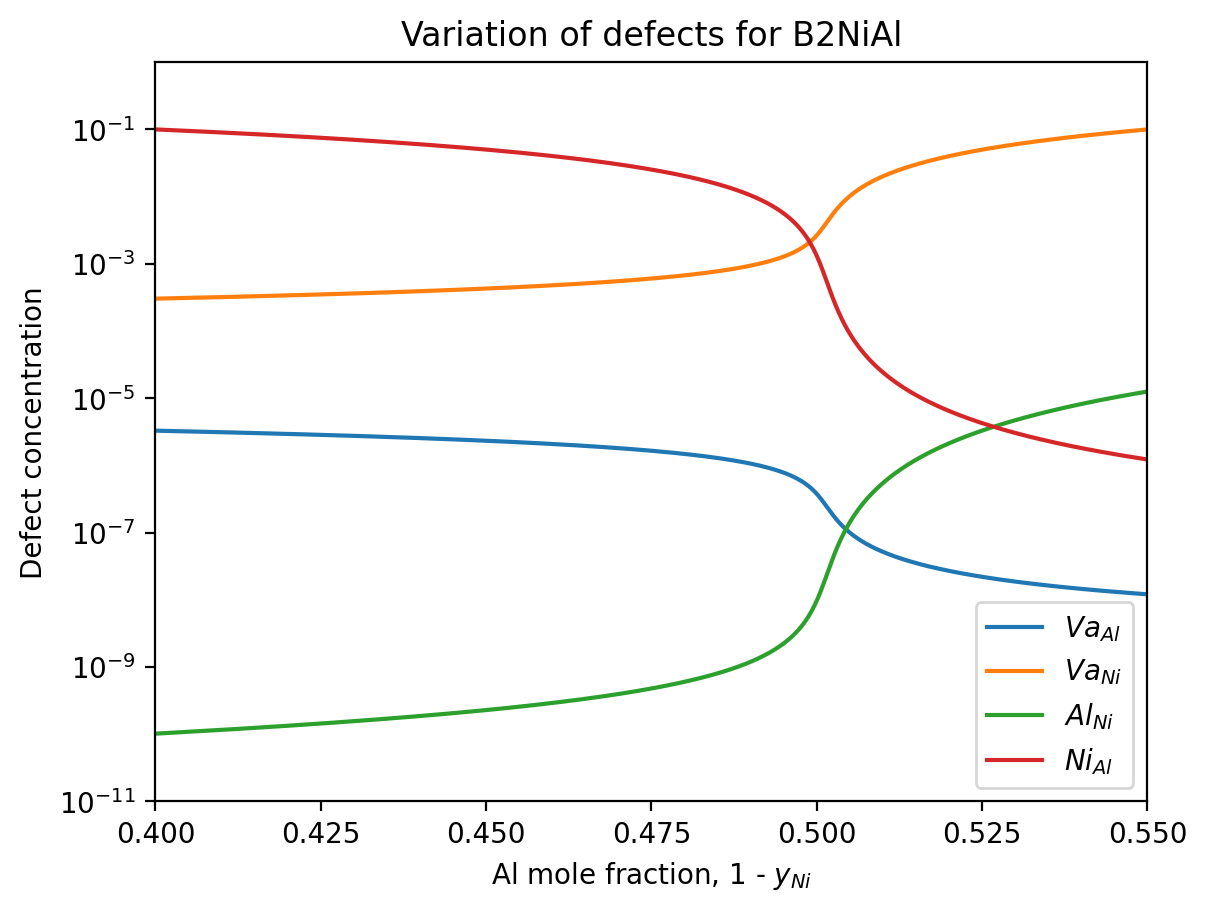

In [22]:
# Variation of defects at 1300K for B2NiAl.
plt.plot(xx, old_ans0)
plt.yscale('log')
plt.xlim([0.4, .55])
plt.ylim([1e-11, 1])
plt.xticks(np.arange(0.4, 0.55, 0.025))
plt.ylabel("Defect concentration")
plt.xlabel("Al mole fraction, 1 - $y_{Ni}$")
plt.legend(["$Va_{Al}$", "$Va_{Ni}$", "$Al_{Ni}$", "$Ni_{Al}$"], loc="lower right")
plt.title("Variation of defects for B2NiAl");

## Comaprison with the chemical potential approach and old approach

The solid lines are derived from chemical potential approach and dashed lines are from old approach


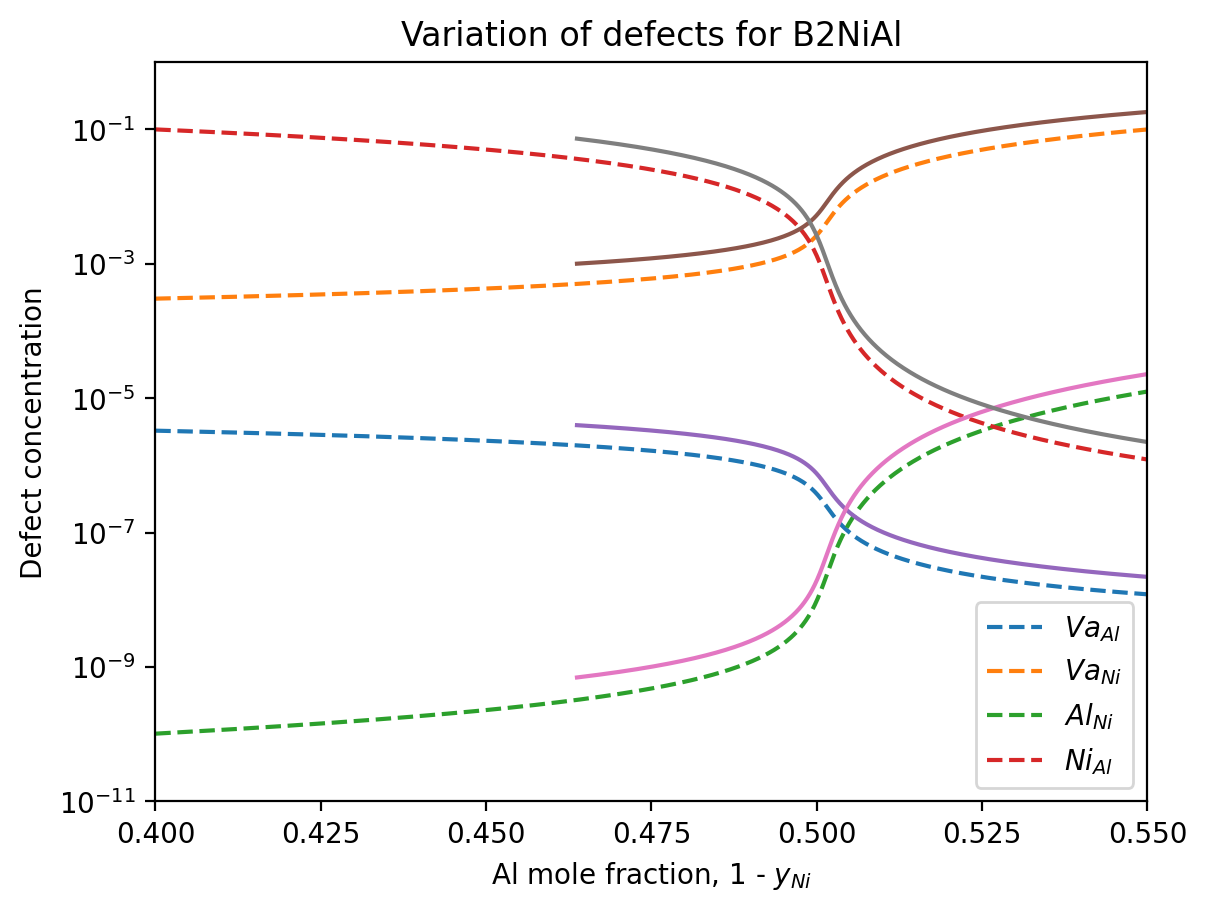

In [23]:
# Variation of defects at 1300K for B2NiAl.
plt.plot(xx, old_ans0, linestyle='--')
plt.plot(conc_Al, get_concentration(Ef_Alvac[index], T), label='Al vac')
plt.plot(conc_Al, get_concentration(Ef_Nivac[index], T), label='Ni vac')
plt.plot(conc_Al, get_concentration(Ef_Alanti[index], T), label='Al anti')
plt.plot(conc_Al, get_concentration(Ef_Nianti[index], T), label='Ni anti')
plt.yscale('log')
plt.xlim([0.4, .55])
plt.ylim([1e-11, 1])
plt.xticks(np.arange(0.4, 0.55, 0.025))
plt.ylabel("Defect concentration")
plt.xlabel("Al mole fraction, 1 - $y_{Ni}$")
plt.legend(["$Va_{Al}$", "$Va_{Ni}$", "$Al_{Ni}$", "$Ni_{Al}$"], loc="lower right")
plt.title("Variation of defects for B2NiAl");
print('The solid lines are derived from chemical potential approach and dashed lines are from old approach')

## Work in progress for Ternary system

# Defect energetics of B2 NiAl + 10%Pt

Not sure with the formulation below.

The Pt sits on the Ni sub-lattice. Therefore Ni concentration maximum is 40%

$$\text{Concentration of Al, Ni and X for ternary B2-NiAl+10\% Pt/Pd}$$
$$ C_{Al} = \frac{0.5 - 0.5*(C_{Va_{Al}} + C_{Ni_{Al}} - C_{Al_{Ni}} - C_{X_{Al}})}{ 1 - 0.33*(C_{Va_{Al}} + C_{Va_{Ni}} + C_{Va_{X}})} $$

$$ C_{Ni} = \frac{0.4 - 0.4*(C_{Va_{Ni}} + C_{Al_{Ni}} - C_{Ni_{Al}} - C_{X_{Ni}})}{ 1 - 0.33*(C_{Va_{Al}} + C_{Va_{Ni}} + C_{Va_{X}})} $$

$$C_{X} = \frac{0.1 - 0.1*(C_{Va_{X}} - C_{X_{Ni}} - C_{X_{Al}})}{ 1 - 0.33*(C_{Va_{Al}} + C_{Va_{Ni}} + C_{Va_{X}})}$$

In [24]:
Mu_Al = np.linspace(2*EfPtB2NiAl, 0, 1000)
Mu_Ni = 2*EfPtB2NiAl - Mu_Al

In [25]:
def get_indexMap(my_list):
    """
    Gives the values in the list and their corresponding indexes.
    
    """
    indexMap = dict()
    for index, val in enumerate(my_list):
        if val in indexMap:
            indexMap[val].append(index)
        else:
            indexMap[val] = [index]
            
    return indexMap    

In [26]:
def comb(n, k):
    
    return np.math.factorial(n) / (np.math.factorial(k)*np.math.factorial(n-k))

In [27]:
def get_prefactor(n, p, r):
    
    return comb(n, r) * p ** r * (1 - p) ** (n - r)

In [28]:
def get_weighted_concentration(concentrations, list_nn, indices_to_eval, Pt_cont, num_nearest_neighbour):
    """
    Gives the binomial weighted average according to the nearest neighbor.
    
    Keyword arguments:
    concentrations (list): List of concentrations which are to be average.
    list_nn (list): List of nearest neighbors.
    indices_to_eval (list): List of indices to evaluate of list_nn.
    Pt_cont (float): Concentration of Pt.
    num_nearest_neighbour (int): Number of nearest neighbors. Ex: 8 for first nearest neighbor, 6 for second nearest neighbour.
    
    """
    
    
    weighted_sum = 0
    total_weight = 0
    
    for index in indices_to_eval:
        prefactor = get_prefactor(num_nearest_neighbour, Pt_cont, list_nn[index])
        weighted_sum += prefactor * concentrations[index]
        total_weight += prefactor
    
    return weighted_sum / total_weight

In [29]:
def get_binomial_weighted_formation_energies(Energies, defect_name):
    if defect_name == 'Nivac':
        c_defect=[]
        list_fnn = [0, 0, 0, 0, 0, 1, 0, 0]
        list_snn = [2, 0, 0, 1, 1, 2, 2, 2]
        for i in range(8):c_defect.append(np.exp(-(get_10Ptbox_energy(Energies[i], i=defect_name) - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') + Mu_Ni) / (Kb*T)))
        
    if defect_name == 'Alvac':
        c_defect=[]
        list_fnn = [2, 3, 1, 3, 2, 1, 1, 3]
        list_snn = [0, 0, 0, 0, 0, 0, 1, 0]
        for i in range(8):c_defect.append(np.exp(-(get_10Ptbox_energy(Energies[i], i=defect_name) - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') + Mu_Al) / (Kb*T)))
    if defect_name == 'Nianti':
        c_defect=[]
        list_fnn = [2, 3, 1, 3, 2, 1, 1, 3]
        list_snn = [0, 0, 0, 0, 0, 0, 1, 0]
        for i in range(8):c_defect.append(np.exp(-(get_10Ptbox_energy(Energies[i], i=defect_name) - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') - Mu_Ni + Mu_Al) / (Kb*T)))
    if defect_name == 'Alanti':
        c_defect=[]
        list_fnn = [0, 0, 0, 0, 0, 1, 0, 0]
        list_snn = [2, 0, 0, 1, 1, 2, 2, 2]
        for i in range(8):c_defect.append(np.exp(-(get_10Ptbox_energy(Energies[i], i=defect_name) - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') - Mu_Al + Mu_Ni) / (Kb*T)))
    if defect_name == 'PtonAl':
        c_defect=[]
        list_fnn = [2, 3, 1, 3, 2, 1, 1, 3]
        list_snn = [0, 0, 0, 0, 0, 0, 1, 0]
        for i in range(8):c_defect.append(np.exp(-(get_10Ptbox_energy(Energies[i], i=defect_name) - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') - Mu_Pt + Mu_Al) / (Kb*T)))
    
    indexMap = get_indexMap(list_fnn)
    second_nn_weighted_concentration = [get_weighted_concentration(c_defect, list_snn, indexMap[i], 
                                                               concentration_Pt, 8) for i in sorted(indexMap)]

    final_wc = get_weighted_concentration(second_nn_weighted_concentration, sorted(indexMap), 
                                      np.arange(len(indexMap)), concentration_Pt, 6)

    return -np.log(final_wc) * Kb * T

In [30]:
def get_binomial_weighted_Pt_on_Ni_Al_energy(Energies):
    
    indexMap = get_indexMap(list_fnn)

    second_nn_weighted_energies = [get_weighted_concentration(Energies, list_snn, indexMap[i], 
                                                               concentration_Pt, 8) for i in sorted(indexMap)]

    final_weighted_energy = get_weighted_concentration(second_nn_weighted_energies, sorted(indexMap), 
                                      np.arange(len(indexMap)), concentration_Pt, 6)

    return final_weighted_energy

In [31]:
def get_10Ptbox_energy(tot, i, Ni_bulk = Ni_bulk, Al_bulk = Al_bulk, Pt_bulk = Pt_bulk):
    """
    Returns supercell energy - n_Ni * Ni_Bulk - n_Al * Al_bulk -n_Pt * Pt_bulk
    
    """
    if i == 'Nivac':
        n_Ni = 50
        n_Al = 64
        n_Pt = 13
    if i == 'Alvac':
        n_Ni = 51
        n_Al = 63
        n_Pt = 13
    if i == 'Ptvac':
        n_Ni = 51
        n_Al = 64
        n_Pt = 12
    if i == 'Nianti':
        n_Ni = 52
        n_Al = 63
        n_Pt = 13
    if i == 'Alanti':
        n_Ni = 50
        n_Al = 65
        n_Pt = 13
    if i == 'PtonNi':
        n_Ni = 50
        n_Al = 64
        n_Pt = 14
    if i == 'PtonAl':
        n_Ni = 51
        n_Al = 63
        n_Pt = 14
    if i == 'Bulk':
        n_Ni = 51
        n_Al = 64
        n_Pt = 13
    return tot - n_Ni * Ni_bulk - n_Al * Al_bulk - n_Pt * Pt_bulk

In [32]:
# Ni vacancy with respect to chemical potential

EfMuPt_Nivac = get_binomial_weighted_formation_energies(Energies_Ni_vac,'Nivac')

In [33]:
# Al vacancy with respect to chemical potential

EfMuPt_Alvac = get_binomial_weighted_formation_energies(Energies_Al_vac,'Alvac')

In [34]:
# Ni antisite with respect to chemical potential

EfMuPt_Nianti = get_binomial_weighted_formation_energies(Energies_Ni_anti,'Nianti')

In [35]:
# Al antisite with respect to chemical potential

EfMuPt_Alanti = get_binomial_weighted_formation_energies(Energies_Al_anti,'Alanti')

In [36]:
# Pt on Al sub-lattice with respect to chemical potential
# Ef = <E_Pt on Al> - <E_Pt on Ni> + mu_Al - mu_Ni

# EfMuPt_PtonAl = get_10Ptbox_energy(get_binomial_weighted_Pt_on_Ni_Al_energy(Energies_PtonAl), i = 'PtonAl') - get_10Ptbox_energy(get_binomial_weighted_Pt_on_Ni_Al_energy(Energies_PtonNi), i = 'PtonNi')  + Mu_Al - Mu_Ni

In [37]:
# Pt vacancy with respect to chemical potential

# EfMuPt_Ptvac = 

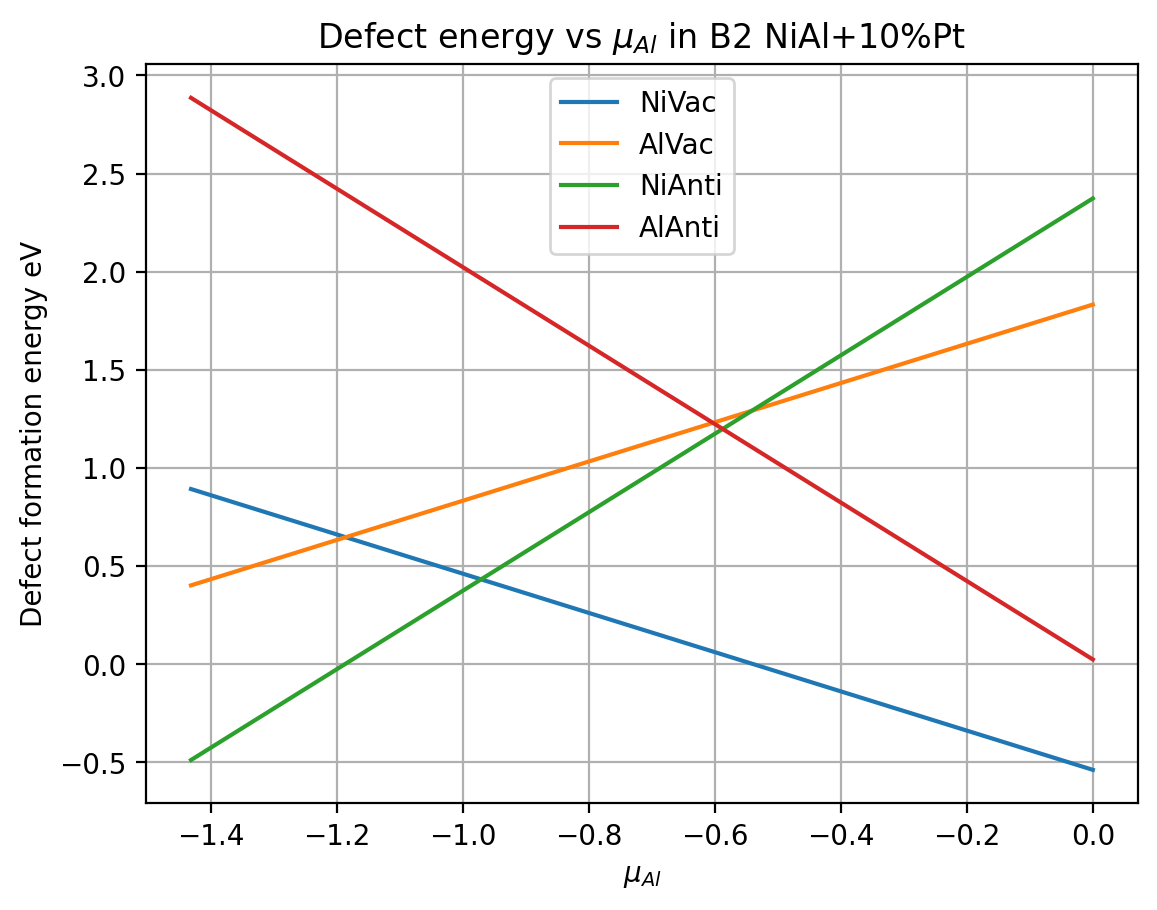

In [38]:
plt.plot(Mu_Al, EfMuPt_Nivac, label='NiVac')
plt.plot(Mu_Al, EfMuPt_Alvac, label='AlVac')
plt.plot(Mu_Al, EfMuPt_Nianti, label='NiAnti')
plt.plot(Mu_Al, EfMuPt_Alanti, label='AlAnti')
# plt.plot(Mu_Al, EfMuPt_PtonNi, label='PtonNi')
# plt.plot(Mu_Al, EfMuPt_PtonAl, label='PtonAl')
plt.xlabel('$\mu_{Al}$')
plt.ylabel('Defect formation energy eV')
plt.legend()
plt.grid()
plt.title('Defect energy vs $\mu_{Al}$ in B2 NiAl+10%Pt');

# Defect concentration of B2 NiAl+10%Pt

In [39]:
# Ternary system concentration of Al

def get_ternary_Al_concentration(C_Al_anti, C_Ni_anti, C_Al_vac, C_Ni_vac, C_Pt_vac, C_PtonAl):
    
    return (0.5 - 0.5*(C_Al_vac + C_Ni_anti + C_PtonAl - C_Al_anti - C_PtonAl)) / (1 - (C_Al_vac + C_Ni_vac + C_Pt_vac)/3)

In [40]:
# Conc_Al = get_ternary_Al_concentration(get_concentration(EfMuPt_Alanti, T), get_concentration(EfMuPt_Nianti, T),
#                                       get_concentration(EfMuPt_Alvac, T), get_concentration(EfMuPt_Nivac, T), 
#                                     get_concentration(EfMuPt_Ptvac, T), get_concentration(EfMuPt_PtonAl, T))

In [41]:
# plt.plot(Conc_Al, get_concentration(EfPt_Alvac, T), label='Alvac')
# plt.plot(Conc_Al, get_concentration(EfPt_Nivac, T), label='Nivac')
# plt.plot(Conc_Al, get_concentration(EfPt_Alanti, T), label='Alanti')
# plt.plot(Conc_Al, get_concentration(EfPt_Nianti, T), label='Nianti')
# plt.plot(Conc_Al, get_concentration(EfPt_PtonNi, T), label='PtonNi')
# plt.plot(Conc_Al, get_concentration(EfPt_PtonAl, T), label='PtonAl')
# plt.xlabel("Al fraction")
# plt.ylabel("Defect concentration")
# plt.title("Defect concentration w.r.t $\mu_{Al}$ in B2NiAl+10%Pt")
# plt.yscale('log')
# plt.legend();